In [110]:
import numpy as np
import pandas as pd

In [111]:
df = pd.read_csv('./data/amsterdam-data.csv', sep=';')

In [399]:
# selection of columns to consider for quantifying indices

columns = [
    'Wijk',
    'Coding_3',
    'Number_of_Inhabitants_5',
    'Men_6',
     'Women_7',
    'k_0To15Years_8',
    'k_15To25Years_9',
    'k_25To45Year_10',
    'k_45To65Year_11',
    'k_65YearsOrOlder_12',
    'WesternTotal_17',
    'NonWesternTotal_18',
    'BirthTotal_24',
    'HouseholdTotal_28',
    'Single-person_households_29',
    'HouseholdsWithoutChildren_30',
    'HouseholdsWithChildren_31',
    'Education_levelLow_64',
    'Level_of_education_Secondary_65',
    'Education_levelHigh_66',
    'Net_labor_force_participation_67',
    'Percentage_of_Employees_68',
    'Percentage_of_Self-Employed_69',
    'AverageIncomePerIncome_Recipient_71',
    'AverageIncomePerInhabitant_72',
    'k_40LowestIncomePeople_73',
    'k_20PersonsWithHighestIncome_74',
    'AvgStandardizedIncomeOfHouseh_75',
    'k_40Lowest_Income_Households_76',
    'k_20HouseholdsWithHighestIncome_77',
    'Low-Income_Households_78',
    'DistanceToGeneral_Practitioner_106',
    'DistanceToGroteSupermarkt_107',
    'DistanceToKinderdagverblijf_108',
    'DistanceToSchool_109',
    'SchoolsWithin_3Km_110',
    'LNG',
    'LAT'
]

In [400]:
# Ratios of different age/gender groups
df['ratio_children'] = df.k_0To15Years_8 / df.Number_of_Inhabitants_5
df['ratio_young'] = (df.k_15To25Years_9 + df.k_25To45Year_10) / df.Number_of_Inhabitants_5
df['ratio_old'] = (df.k_45To65Year_11 + df.k_65YearsOrOlder_12) / df.Number_of_Inhabitants_5
df['ratio_women'] = df.Women_7 / df.Number_of_Inhabitants_5

# Ratios of people with migration background
df['ratio_western_immigration'] = df.WesternTotal_17 / df.Number_of_Inhabitants_5
df['ratio_nonwester_immigration'] = df.NonWesternTotal_18 /  df.Number_of_Inhabitants_5
df['ratio_immigration'] = (df.WesternTotal_17 + df.NonWesternTotal_18) /  df.Number_of_Inhabitants_5

# Ratio of households with children
df['ratio_household_with_children'] = df.HouseholdsWithChildren_31 / df.HouseholdTotal_28

# Ratio of people with low education level
df['ratio_low_ed'] = df.Education_levelLow_64 / df.Number_of_Inhabitants_5


# Isolation coefficient

In [401]:
# Inverse of number of schools within 3km diameter
df['school_inverse'] = 1 / df.SchoolsWithin_3Km_110
df['school_inverse'].describe()

count    99.000000
mean      0.054850
std       0.042625
min       0.019920
25%       0.027068
50%       0.037736
75%       0.067797
max       0.277778
Name: school_inverse, dtype: float64

In [404]:
# Isolation coefficient based on - distance to GP/supermarket/kindergarten/schools and school_inverse
df['isolation'] = (df.DistanceToGeneral_Practitioner_106 + df.DistanceToGroteSupermarkt_107) * \
    (df.DistanceToKinderdagverblijf_108 + df.DistanceToSchool_109) + df.school_inverse * 10

df['isolation'].describe()

count    99.000000
mean      2.013350
std       2.875977
min       0.401207
25%       0.716796
50%       1.228410
75%       2.036608
max      21.107778
Name: isolation, dtype: float64

In [405]:
# Sorted by isolation
df.sort_values(by=['isolation'])

,Unnamed: 0,Wijk,Municipality_1,Coding_3,Change_in_layout_WijkenEnBuurten_4,Number_of_Inhabitants_5,Men_6,Women_7,k_0To15Years_8,k_15To25Years_9,...,socio,economic,avg_income_scaled,demography,economic_dis,economic_disadvantage,socio_disadvantage,demographic_demand,ratio_men,AverageIncomePerIncome_Recipient
19,19,Van Lennepbuurt,Amsterdam,WK036319,1,6955,3435,3525,625,655,...,0.055009,6.945900,0.160891,0.657331,6.945900,0.755960,0.055009,0.657331,0.493889,39.300000
17,17,Da Costabuurt,Amsterdam,WK036317,1,4650,2320,2325,435,405,...,0.010336,4.149476,0.277228,0.648789,4.149476,0.562867,0.010336,0.648789,0.498925,48.700000
38,38,Erasmuspark,Amsterdam,WK036338,1,5840,2765,3070,640,640,...,0.042368,5.711066,0.193069,0.715521,5.711066,0.555445,0.042368,0.715521,0.473459,41.900000
25,25,Nieuwe Pijp,Amsterdam,WK036325,1,12375,5955,6425,1080,1230,...,0.025407,4.354126,0.266089,0.662772,4.354126,0.616907,0.025407,0.662772,0.481212,47.800000
18,18,Kinkerbuurt,Amsterdam,WK036318,1,6735,3445,3295,720,625,...,0.039511,4.581579,0.250000,0.648414,4.581579,0.603084,0.039511,0.648414,0.511507,46.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,Omval/Overamstel,Amsterdam,WK036358,1,5250,2735,2515,420,790,...,0.008470,2.952372,0.394802,0.584077,2.952372,0.436639,0.008470,0.584077,0.520952,58.200000
80,80,Lutkemeer/Ookmeer,Amsterdam,WK036380,1,1190,660,530,175,160,...,0.113693,NaN,0.221947,0.770378,NaN,0.708338,0.113693,0.770378,0.554622,44.233333
11,11,Bedrijventerrein Sloterdijk,Amsterdam,WK036311,1,860,530,325,10,305,...,0.080449,NaN,0.221947,0.391330,NaN,0.912274,0.080449,0.391330,0.616279,44.233333
10,10,Westelijk Havengebied,Amsterdam,WK036310,1,145,85,60,5,55,...,0.016647,NaN,0.221947,0.497126,NaN,0.878832,0.016647,0.497126,0.586207,44.233333


# Economic disadvantage coefficient

In [414]:
# Missing values 

cols = ['Low-Income_Households_78', 'k_40LowestIncomePeople_73', 'Net_labor_force_participation_67', 'AverageIncomePerIncome_Recipient_71']
df[cols].isnull().sum()

Low-Income_Households_78               0
k_40LowestIncomePeople_73              0
Net_labor_force_participation_67       0
AverageIncomePerIncome_Recipient_71    0
dtype: int64

In [412]:
# Imputate the missing values with mean of the corresponding column
for c in cols:
    df[c] = df[c].fillna(df[c].mean())

In [312]:
df[cols].describe()

,Low-Income_Households_78,k_40LowestIncomePeople_73,Net_labor_force_participation_67
count,99.000000,99.000000,99.000000
mean,11.281443,38.761224,68.326531
std,3.825967,8.452407,6.226631
min,2.200000,18.800000,39.000000
25%,8.350000,33.250000,64.500000
50%,11.300000,37.400000,68.000000
75%,14.100000,45.050000,73.000000
max,20.400000,66.600000,81.000000


In [417]:
# Economic disadvantage coefficient based on - 
# percentages of low-income households / people with lowest 40% income 
# inverse of employment rate / inverse of income per recipient

df['economic_disadvantage'] = \
    (df['Low-Income_Households_78']/100) + (df['k_40LowestIncomePeople_73']/100) + \
    (1/df['Net_labor_force_participation_67']*10) + (1/df['AverageIncomePerIncome_Recipient_71'])

In [418]:
df['economic_disadvantage'].describe()

count    99.000000
mean      0.672752
std       0.131991
min       0.380193
25%       0.570669
50%       0.654176
75%       0.772239
max       0.964666
Name: economic_disadvantage, dtype: float64

# Social disadvantage coefficient

In [419]:
# Social disadvantage coefficient based on - 
# ratio of people with low education level and ratio of people with non-western migration background

df['socio_disadvantage'] = df.ratio_low_ed * df.ratio_nonwester_immigration
df['socio_disadvantage'].describe()

count    99.000000
mean      0.061595
std       0.054628
min       0.002331
25%       0.019508
50%       0.042008
75%       0.099825
max       0.213252
Name: socio_disadvantage, dtype: float64

# Demographic demand coefficient

In [420]:
# Demographic demand coefficient based on ratio of households with children and ratio of women

df['demographic_demand'] = df['ratio_household_with_children'] + df['ratio_women']
df['demographic_demand'].describe()

count    99.000000
mean      0.741639
std       0.127348
min       0.391330
25%       0.662874
50%       0.740852
75%       0.817307
max       1.100000
Name: demographic_demand, dtype: float64

# Correlation of the coefficients

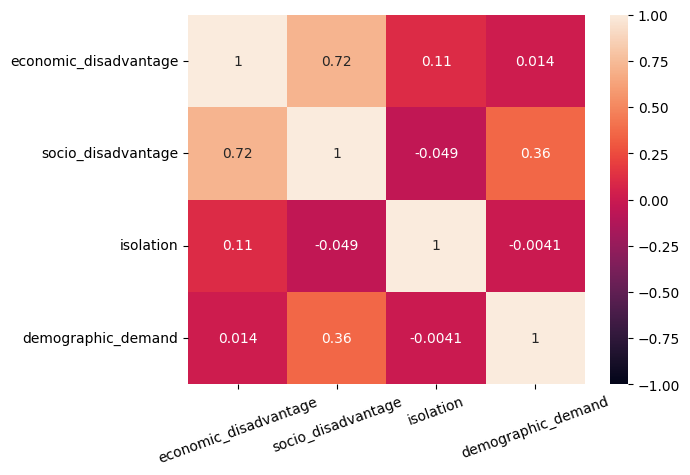

In [423]:
# Heatmap of correlation of the coefficient

import seaborn as sns

fig = sns.heatmap(df[['economic_disadvantage', 'socio_disadvantage', 'isolation', 'demographic_demand', 
               ]].corr(), vmin=-1, vmax=1, annot=True).get_figure()

plt.xticks(rotation=20) 
plt.yticks(rotation=0) 

fig.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Calculating quantifying indices

In [424]:
cols =['economic_disadvantage', 'socio_disadvantage', 'isolation', 'demographic_demand', 'ratio_women']

In [425]:
df[['economic_disadvantage', 'socio_disadvantage', 'isolation', 'demographic_demand', 'ratio_women']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   economic_disadvantage  99 non-null     float64
 1   socio_disadvantage     99 non-null     float64
 2   isolation              99 non-null     float64
 3   demographic_demand     99 non-null     float64
 4   ratio_women            99 non-null     float64
dtypes: float64(5)
memory usage: 4.0 KB


In [428]:
data = df[['Wijk', 'LAT', 'LNG']+cols].copy()


# MinMax scale each coefficients so that they are in the same scale
# to ensure no one coefficient contributes too much or too less
for c in cols:
     data[c] = (data[c] - min(data[c])) / (max(data[c] - min(data[c])))

In [430]:
# Compute the quantifying index by summing the coefficients
def metric(df, cols=cols):
    df['metric'] = df[cols].sum(axis=1)
    return df

data = metric(data)

In [431]:
# Sort the Neighborhoods by descending order of final 'metric' or quantifying index

data.sort_values(by="metric", ascending=False)[['Wijk', 'metric']+cols]

,Wijk,metric,economic_disadvantage,socio_disadvantage,isolation,demographic_demand,ratio_women
78,Geuzenveld,3.346258,0.834228,1.000000,0.031099,0.716581,0.764351
96,Holendrecht,3.187890,0.776717,0.730628,0.134363,0.657177,0.889006
93,H-buurt,3.150210,0.911529,0.929263,0.077678,0.485697,0.746042
82,Osdorp-Midden,3.131694,0.748648,0.856971,0.029376,0.672145,0.824553
76,Slotermeer-Noordoost,3.121461,0.912840,0.895908,0.024328,0.582051,0.706333
...,...,...,...,...,...,...,...
23,Zuidas,1.236245,0.131028,0.125587,0.054500,0.300747,0.624383
1,Burgwallen-Nieuwe Zijde,1.222770,0.409791,0.072838,0.043235,0.167038,0.529867
3,Grachtengordel-Zuid,1.152271,0.237038,0.028508,0.019306,0.283315,0.584104
36,Sloterdijk-West,1.077911,0.201671,0.032697,0.084988,0.258484,0.500071


In [386]:
# Save the final results as a csv file
data.to_csv('./data/data.csv', sep=';')